In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

/var/folders/28/1mn9g8c15hlbhggjqk6g8wrm0000gn/T/ipykernel_28637/751784414.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [26]:
import openpyxl

In [27]:
df = pd.read_excel("도서관정보나루_참여도서관목록.xlsx")
print(df.head())


       도서관명                                       주소          전화번호  \
0   2.28도서관                         대구광역시 중구 2·28길 9  053-257-2280   
1  U보라작은도서관  경상남도 김해시 전하로176번길 71, 반도보라아파트 주민공동시설 2층  055-324-3335   
2    가락몰도서관                       서울특별시 송파구 양재대로 932  02-3435-0950   
3     가산도서관                      경기도 포천시 가산면 선마로 223  031-538-3987   
4    가수원도서관                      대전광역시 서구 가수원로 91-11  042-288-4770   

           팩스번호         위도          경도  \
0  053-257-2284  35.859250  128.589405   
1             -  35.223558  128.874226   
2  02-3435-0959  37.492994  127.112326   
3  031-538-3985  37.848403  127.186356   
4  042-288-5937  36.301900  127.348812   

                                                홈페이지  \
0         http://library.daegu.go.kr/228lib/index.do   
1      http://lib.gimhae.go.kr/01293/01298/00212.web   
2                     http://www.splib.or.kr/spalib/   
3                    https://lib.pocheon.go.kr/gasan   
4  http://www.seogu.go.kr/learning/gasuwonlib/

In [28]:
df.shape

(1464, 10)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   도서관명    1464 non-null   object 
 1   주소      1464 non-null   object 
 2   전화번호    1464 non-null   object 
 3   팩스번호    1426 non-null   object 
 4   위도      1464 non-null   float64
 5   경도      1464 non-null   float64
 6   홈페이지    1464 non-null   object 
 7   운영시간    1428 non-null   object 
 8   휴관일     1431 non-null   object 
 9   도서관코드   1464 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 114.5+ KB


In [30]:
df.dtypes

도서관명      object
주소        object
전화번호      object
팩스번호      object
위도       float64
경도       float64
홈페이지      object
운영시간      object
휴관일       object
도서관코드      int64
dtype: object

In [31]:
map_df = df[["도서관명","위도","경도"]]

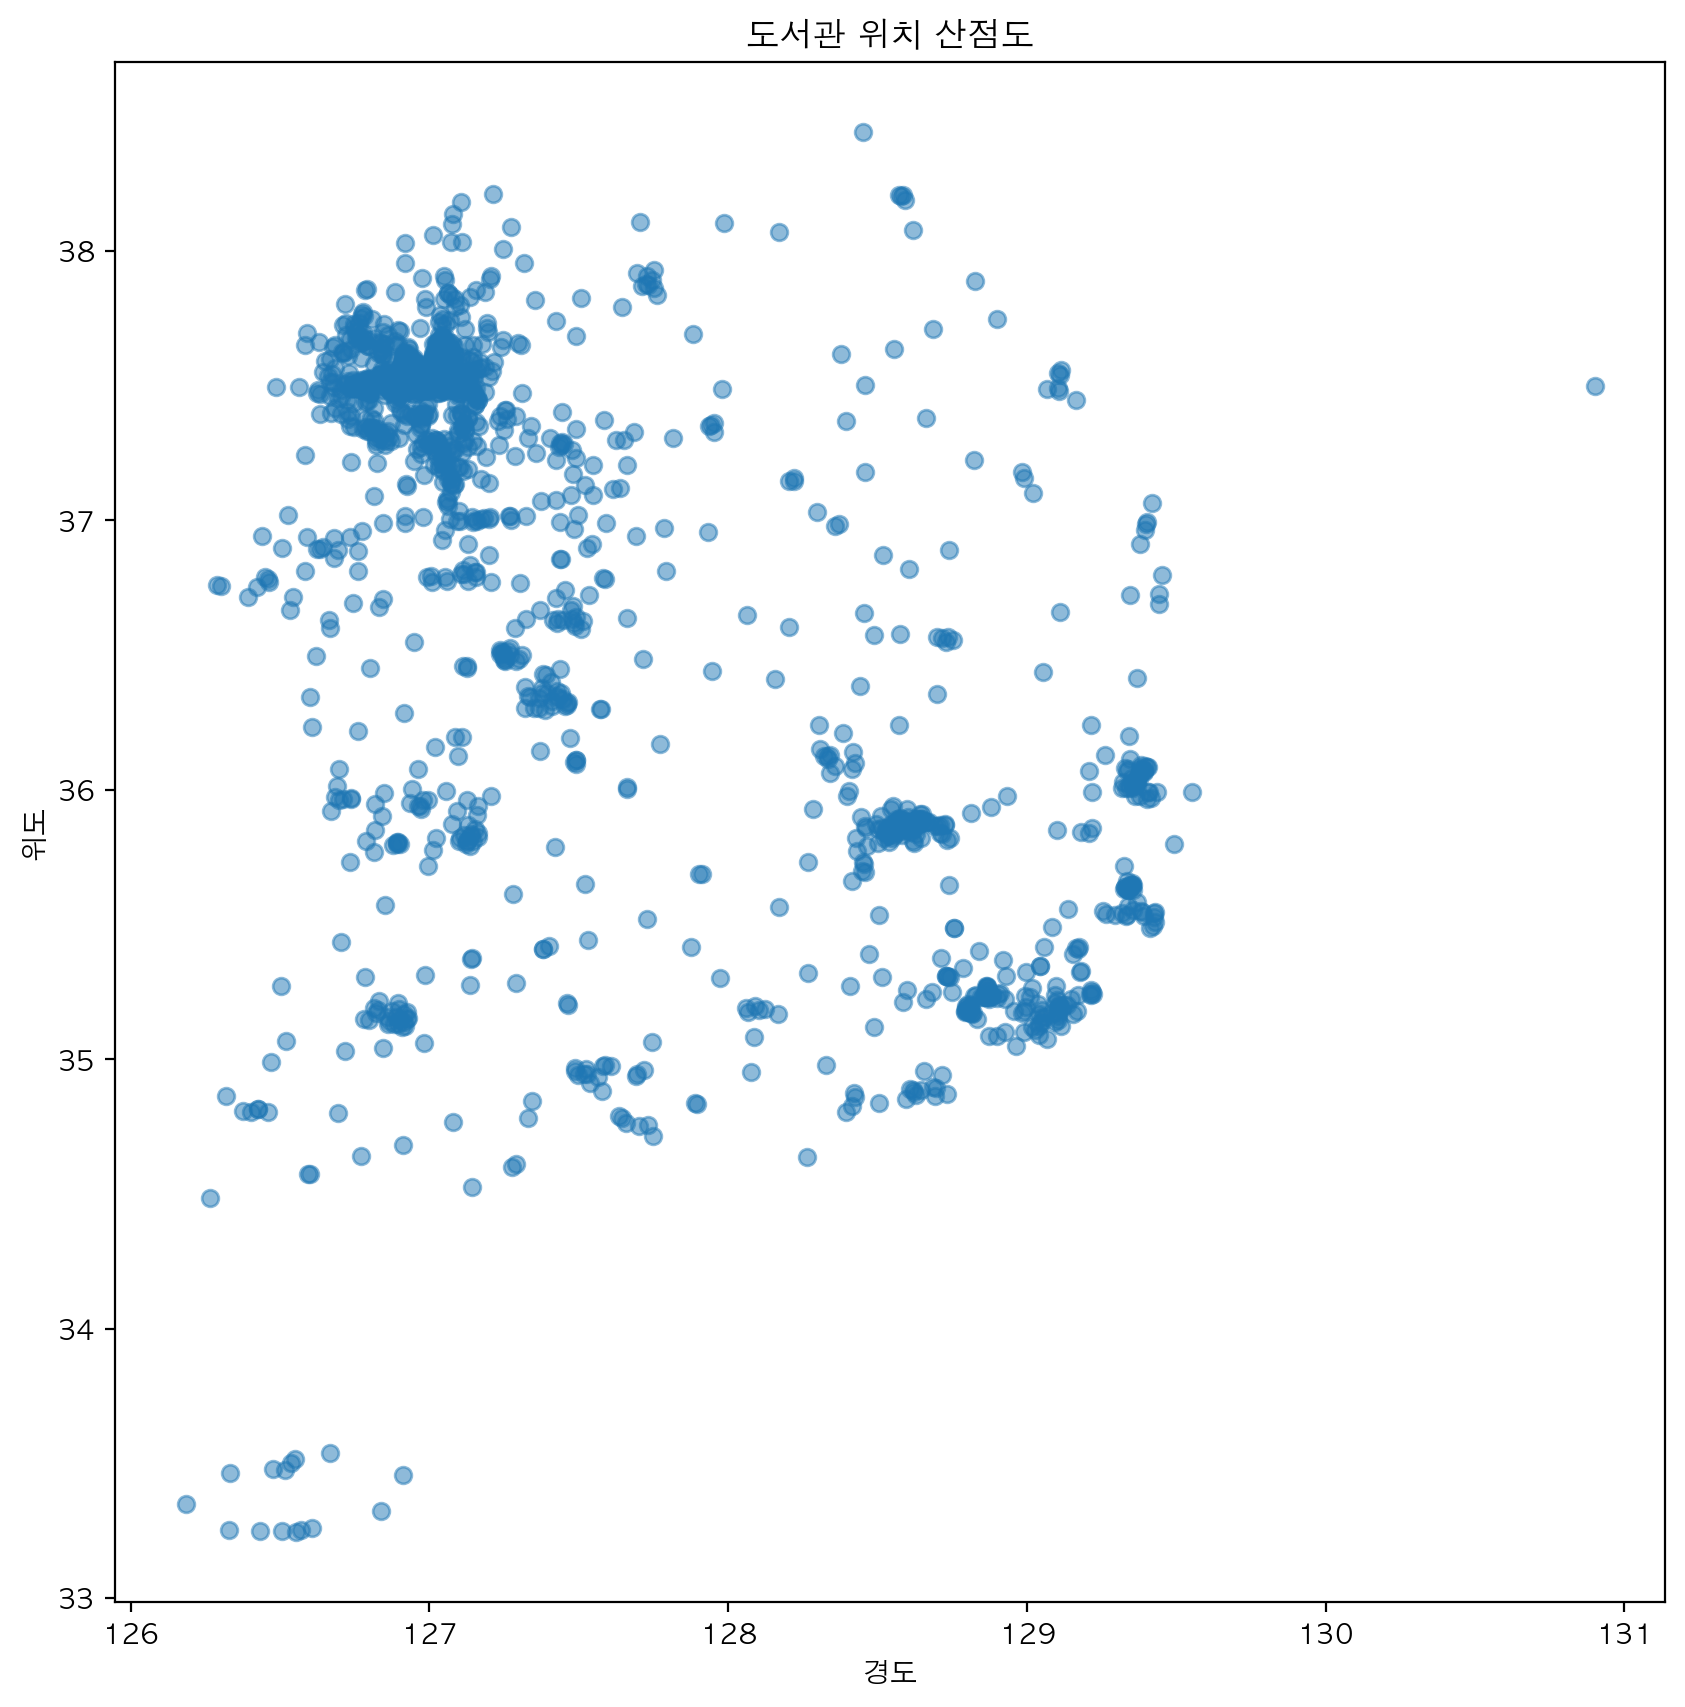

In [40]:
map_df = df[["도서관명", "위도", "경도", "주소"]]

plt.figure(figsize=(10, 10))
plt.scatter(map_df["경도"], map_df["위도"], alpha=0.5)

plt.title("도서관 위치 산점도")
plt.xlabel("경도")
plt.ylabel("위도")

plt.show()


In [52]:
import folium

In [42]:
print(map_df["위도"].mean())
map_df["경도"].mean()

36.68283322739071


127.54712288463115

In [58]:
df_map = map_df.dropna(subset=["위도", "경도"])

map_center = [df_map["위도"].mean(), df_map["경도"].mean()]

map = folium.Map(location=map_center, zoom_start=9)

for n in df_map.index:
    name = df_map.loc[n, "도서관명"]
    address = df_map.loc[n, "주소"]
    popup = f"{name} - {address}"
    location = [df_map.loc[n, "위도"], df_map.loc[n, "경도"]]
    folium.Marker(
        location=location,
        popup=popup,
    ).add_to(map)

map
